# Praca domowa 3
## Konstanty Kraszewski
Wykorzystanie algorytmu Support Vector Machine do dwóch zbiorów danych:
- apartments z R-owego pakietu DALEX,
- [Gender voice](https://www.apispreadsheets.com/datasets/119).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from dalex.datasets import load_apartments

In [2]:
def train_svm(df):
    X = df[df.columns[:-1]]
    y = df[df.columns[-1]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
    svm = SVC()
    svm.fit(X_train, y_train)
    print('Accuracy score: ', svm.score(X_test, y_test))

### Wczytanie i obróbka danych

#### Pierwszy zbiór

In [3]:
df1 = load_apartments()
df1

,m2_price,construction_year,surface,floor,no_rooms,district
1,5897,1953,25,3,1,Srodmiescie
2,1818,1992,143,9,5,Bielany
3,3643,1937,56,1,2,Praga
4,3517,1995,93,7,3,Ochota
5,3013,1992,144,6,5,Mokotow
...,...,...,...,...,...,...
996,6355,1921,44,2,2,Srodmiescie
997,3422,1921,48,10,2,Bemowo
998,3098,1980,85,3,3,Bemowo
999,4192,1942,36,7,1,Zoliborz


In [4]:
le = LabelEncoder()
df1['district'] = le.fit_transform(df1['district'])

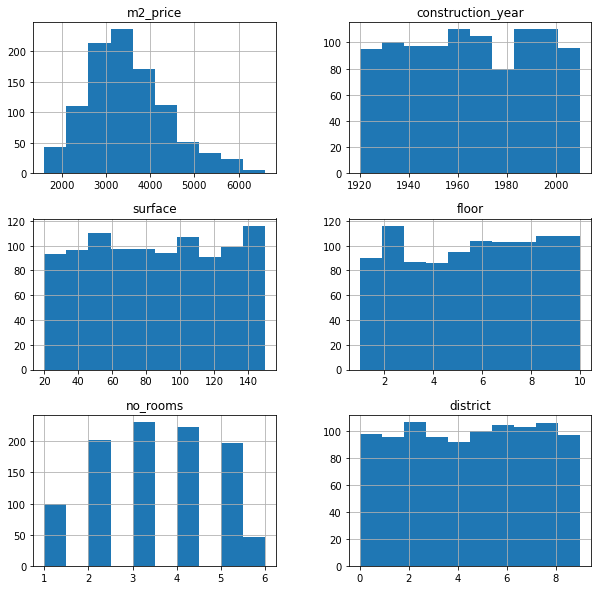

In [5]:
df1.hist(figsize=(10,10))
plt.show()

#### Drugi zbiór

In [6]:
df2 = requests.get('https://api.apispreadsheets.com/api/dataset/gender-voice/')
df2 = df2.json()
df2 = pd.json_normalize(df2, 'data')
df2 = df2.drop(columns=['kurt','centroid','dfrange'])
df2['skew'] = np.log1p(df2['skew'])
df2

,meanfreq,sd,median,Q25,Q75,IQR,skew,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,maxdom,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,2.629257,0.893369,0.491918,0.000000,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,3.153731,0.892193,0.513724,0.000000,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,3.458118,0.846389,0.478905,0.000000,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,0.803270,0.963322,0.727232,0.083878,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,0.742496,0.971955,0.783568,0.104261,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.016002,0.962934,0.763182,0.200836,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.526933,0.960716,0.709570,0.013683,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.056575,0.946854,0.654196,0.008006,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,0.952069,0.950436,0.675470,0.212202,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,0.311002,female


In [7]:
le = LabelEncoder()
df2['label'] = le.fit_transform(df2['label'])

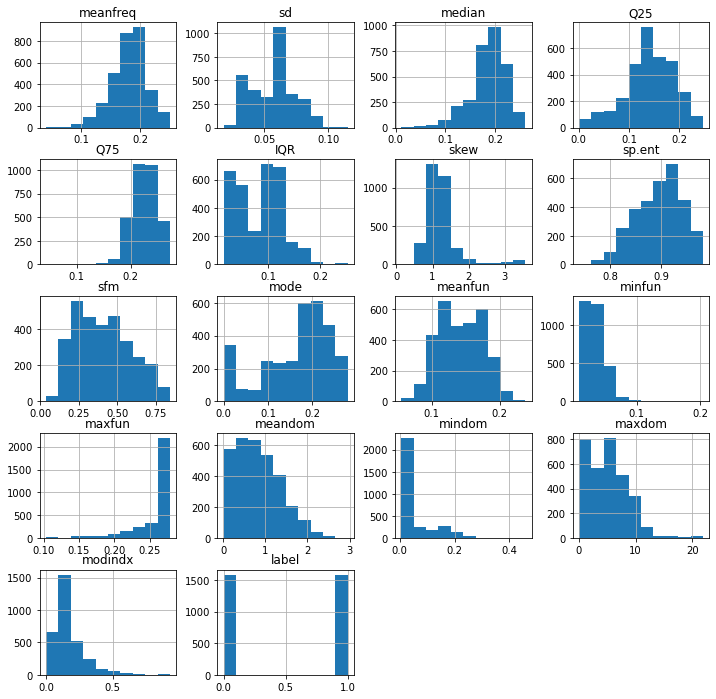

In [8]:
df2.hist(figsize=(12,12))
plt.show()

### Podstawowe trenowanie

In [9]:
train_svm(df1)

Accuracy score:  0.23333333333333334


In [10]:
train_svm(df2)

Accuracy score:  0.7549947423764458


### Trenowanie ze skalowaniem

In [11]:
mms = MinMaxScaler()
df1_scaled = df1.copy()
df1_scaled[df1.columns[:-1]] = mms.fit_transform(df1_scaled[df1.columns[:-1]])

train_svm(df1_scaled)

Accuracy score:  0.35333333333333333


In [12]:
mms = MinMaxScaler()
df2_scaled = df2.copy()
df2_scaled[df2.columns[:-1]] = mms.fit_transform(df2_scaled[df2.columns[:-1]])

train_svm(df2_scaled)

Accuracy score:  0.9842271293375394


Rzeczywiście widać, że skalowanie danych może mieć duży wpływ na wyniki modeli.

### Optymalizacja hiperparametrów dla skalowanego zbioru apartments

In [13]:
mms = MinMaxScaler()
df1_scaled = df1.copy()
df1_scaled[df1.columns[:-1]] = mms.fit_transform(df1_scaled[df1.columns[:-1]])

X = df1_scaled[df1_scaled.columns[:-1]]
y = df1_scaled[df1_scaled.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [14]:
svm = SVC()

parameters = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': ['auto', 'scale', 0.1, 1, 10, 100],
    'degree': [0, 1, 2, 3, 4, 5, 6]
}

clf_rand = RandomizedSearchCV(svm, parameters, cv=5, n_iter=21)

clf_rand.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=21,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'degree': [0, 1, 2, 3, 4, 5, 6],
                                        'gamma': ['auto', 'scale', 0.1, 1, 10,
                                                  100]})

In [15]:
pd.DataFrame(clf_rand.cv_results_)[['params', 'mean_test_score']].sort_values('mean_test_score', ascending=False)

,params,mean_test_score
10,"{'gamma': 1, 'degree': 3, 'C': 10}",0.308571
8,"{'gamma': 'scale', 'degree': 2, 'C': 10}",0.298571
2,"{'gamma': 0.1, 'degree': 5, 'C': 10}",0.294286
19,"{'gamma': 0.1, 'degree': 1, 'C': 10}",0.294286
5,"{'gamma': 'scale', 'degree': 3, 'C': 1}",0.294286
14,"{'gamma': 'scale', 'degree': 1, 'C': 1}",0.294286
7,"{'gamma': 1, 'degree': 3, 'C': 1000}",0.292857
1,"{'gamma': 'auto', 'degree': 3, 'C': 10}",0.284286
15,"{'gamma': 10, 'degree': 1, 'C': 1}",0.262857
11,"{'gamma': 10, 'degree': 3, 'C': 1}",0.262857


Niestety nie udało się uzyskać lepszych wyników.